In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset contains the data of the customer. On the basis of the data we have to predict the churn rate by the customer.

The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod', 'MonthlyCharges', 'TotalCharges', and 'Churn'

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective
group over a specific period. It is one two primary factors that determine the steady-state level of customers a business will support. The term is 
used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a 
subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in 
peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing
investment using marketing mix modeling.

## Importing Dataset

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/Datasets/main/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains the details of customers in which both numerical and categorical data are present. Here 'Churn' is the target variable 
which contains 2 categories so it will be termed as "Classification Problem" where we need to predict the several churn using the classification models. -This observation is not correct beacause it not written by observing all the 'churn' values.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.tail(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4,No
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


## Exploratory Data Analysis

In [4]:
#Checking dimensions of the dataset
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns. Out of which 1 is target variable and remaining 20 are independent variables.

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#checking the columns of the dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
#checking the data types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three different types of data (int64, float64, and object) are present in the dataset.

## np.nan, None, NaN, others

In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

0

As we can see there are no null values present in the dataset.

<Axes: >

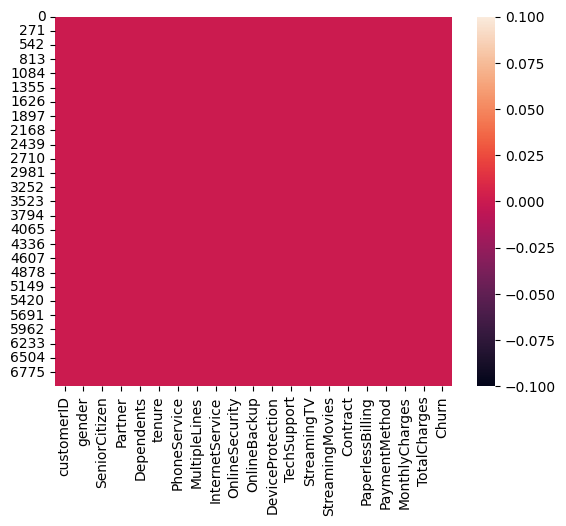

In [17]:
#Let's visualize this in heatmap
sns.heatmap(df.isnull())

And we clearly visualize that there is no missing data present.

In [18]:
#To get a good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This gives the brief about the dataset which includes indexing type, column type, no null values and memory usage.

In [19]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
df['TotalCharges'].nunique()

6531

In [21]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

These are the value counts of all columns and we can see 'blank' in TotalCharges column. Let's check out the unique values of that column.

In [22]:
#Checking the unique values of TotalCharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [23]:
#Checking the number of unique values of TotalCharges column
df['TotalCharges'].nunique()

6531

In [24]:
df.shape[0]

7043

We can notice that 'TotalCharges' has continuous data but it is reflecting as object datatype. And 11 records of this column has 'blank' data.
Let's handle this column.

In [25]:
#Checking the space in TotalCharges column
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the rows which has 'Spaces' as values in the TotalCharges column, let's fill these 'spaces' with some values.

In [26]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [27]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
#converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

TotalCharges values are converted to float. Now handling the nan values.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we have filled blank spaces with nan values in TotalCharges, it is showing 11 null values in that column. Replacing the NaN values using mean
method as the data has continuous values.

In [31]:
np.mean(df['TotalCharges'])

2283.3004408418656

In [32]:
df.iloc[488:500,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,No
491,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,No
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,No
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.40,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No


In [33]:
#Checking the mean of TotalCharges column
print("The mean value of TotalCharges is:", df['TotalCharges'].mean())

The mean value of TotalCharges is: 2283.3004408418656


In [34]:
#Filling NaN values in TotalCharges with its mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

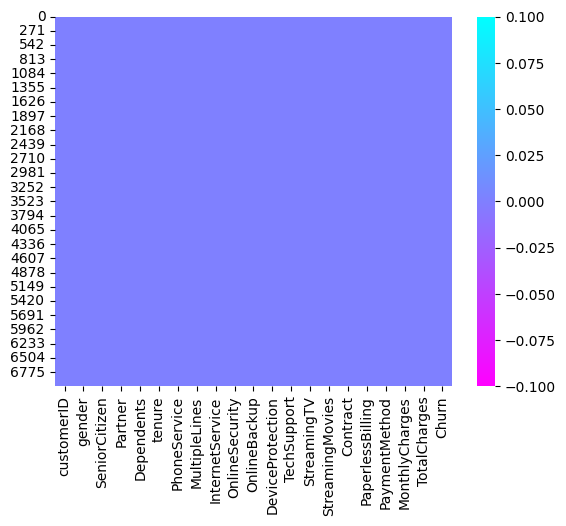

In [36]:
#Lets check the NaN values again
sns.heatmap(df.isnull(), cmap = 'cool_r')

In [37]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

Now we can see there are no missing values in any of the column.

In [38]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Cloumns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Cloumns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [39]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset. Here CustomerID column has the data of unique ID to the customers which can be dropped.

In [40]:
#Dropping CustomerID column
df.drop("customerID", axis = 1, inplace = True)

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
#checking the list of counts of target
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

There are two categories present in the target column namely "Yes" and "No"

In [43]:
#Checking the unique values in the target column
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

We can assume that "No" stands for the customers who have not chaurned and "Yes" stand for the customers who have got churned from the company.

## Description of Dataset

In [44]:
#Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative / 
invalid values present.

From the above description we can observe the following:

    1) The counts of all the columns are same, which means there are no missing values in the dataset.
    
    2) The mean value is greater than the median(50%) in tenure and TotalCharges column, which means the data is skewed to right in these columns.
    
    3) The data in the column MonthlyCharges have mean values less than median, which means the data is skewed to left.
    
    4) By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data.
    
    5) We can also notice the Standard deviation, min, 25% percentile values from the describe method.

## Data Visualization

### Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


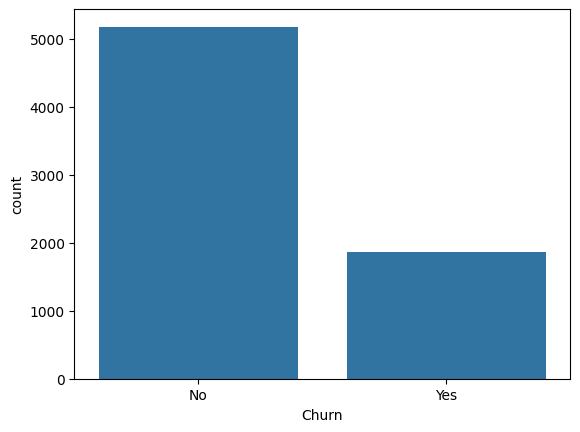

In [45]:
#Visualize the number of Churned customers
ax = sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

We can observe that the count of "No churn" are higher compared to the count of "Yes churn" i.e., there are more number of customers who have not 
churned. This leads to class imbalance issue in the data. We will rectify it by using oversampling method in later part.

gender
Male      3555
Female    3488
Name: count, dtype: int64


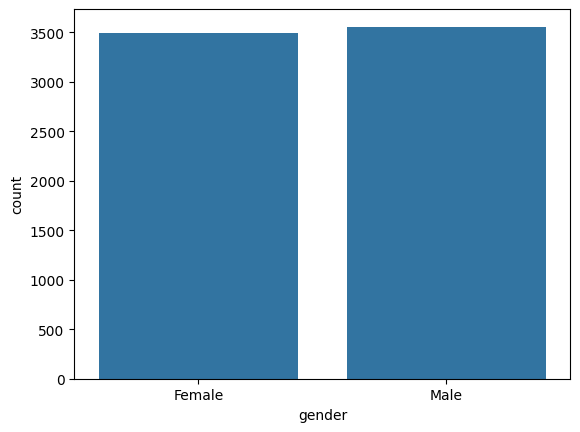

In [46]:
#Visualizing the count of Gender
print(df['gender'].value_counts())
ax = sns.countplot(x='gender', data=df)
plt.show()

gender
Male      3555
Female    3488
Name: count, dtype: int64


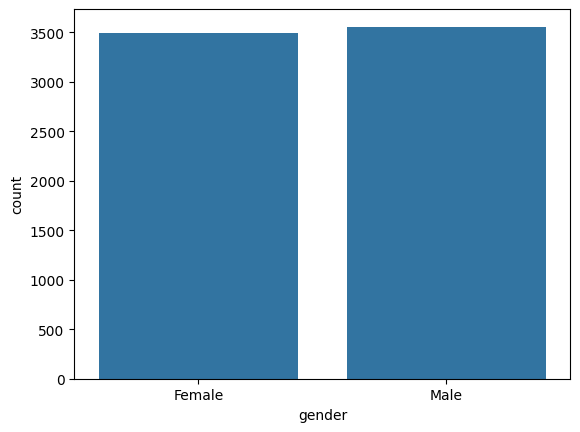

In [47]:
#Visualizing the count of Gender
print(df['gender'].value_counts())
ax = sns.countplot(x='gender', data=df)
#plt.show()

From the plot we can observe that the total number of males and females are almost same.

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


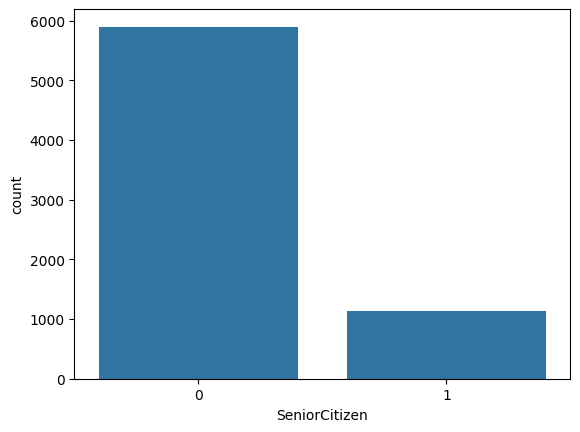

In [48]:
#Visualizing the count of SeniorCitizen
print(df['SeniorCitizen'].value_counts())
ax = sns.countplot(x='SeniorCitizen', data=df)
plt.show()

Here 0 repesents non-senior citizens and 1 represents senior citizens. The count of 0 is high compared to 1, which means the number of non-senior 
citizens are quite high compared to senior citizens data in the dataset.

Partner
No     3641
Yes    3402
Name: count, dtype: int64


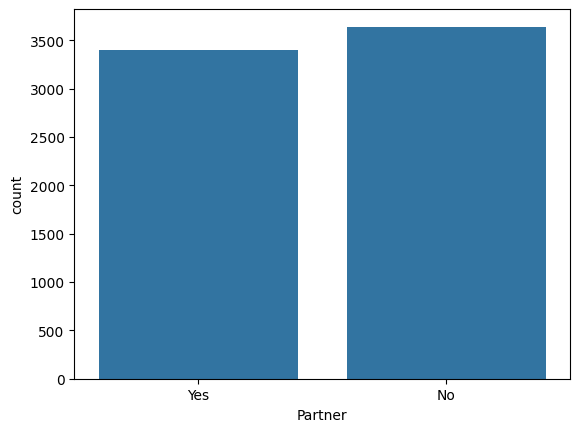

In [49]:
#Visualizing the count of Partner
print(df['Partner'].value_counts())
ax = sns.countplot(x='Partner', data=df)
plt.show()

Non-partners customers are bit higher in count than customers having partners.

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


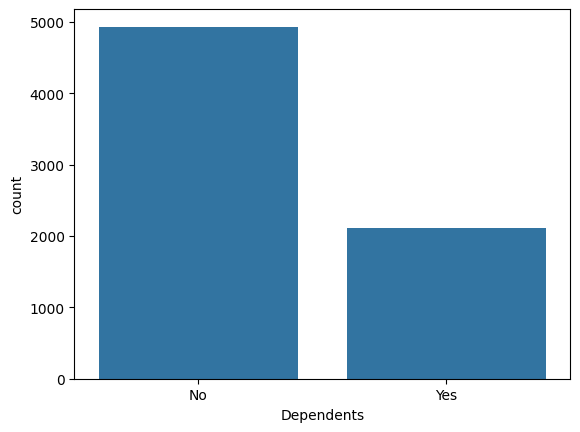

In [50]:
#Visualizing the count of Dependents
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', data=df)
plt.show()

The customers who have/are dependents are less compared to non-dependents. 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


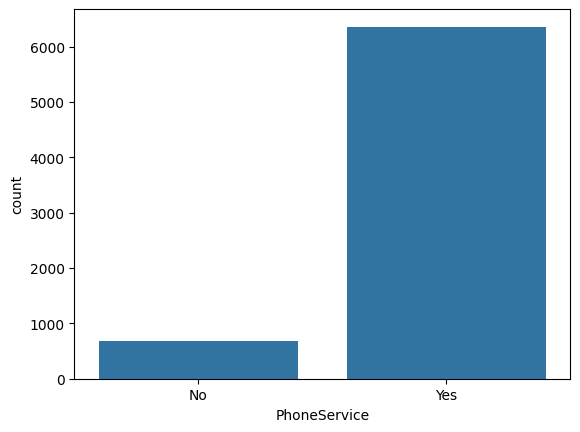

In [51]:
#Visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
ax = sns.countplot(x='PhoneService', data=df)
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


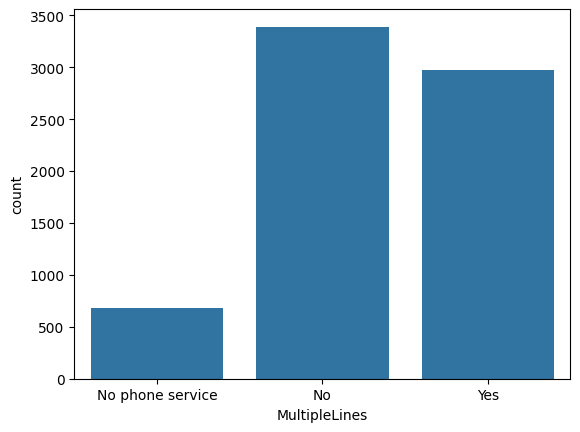

In [52]:
#Visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
ax = sns.countplot(x='MultipleLines', data=df)
plt.show()

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, 
also the customers who do not have phone services have covered very less data compared to others.

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


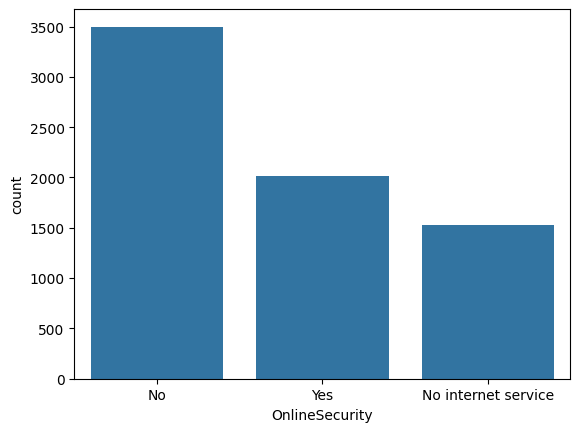

In [53]:
#Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
ax = sns.countplot(x='OnlineSecurity', data=df)
plt.show()

The customers having 'Internet Services' needs online security and who do not own any internet services, they do not need any online security.
But from the plot we can observe that the majority of customers who have internet services have low online security.

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


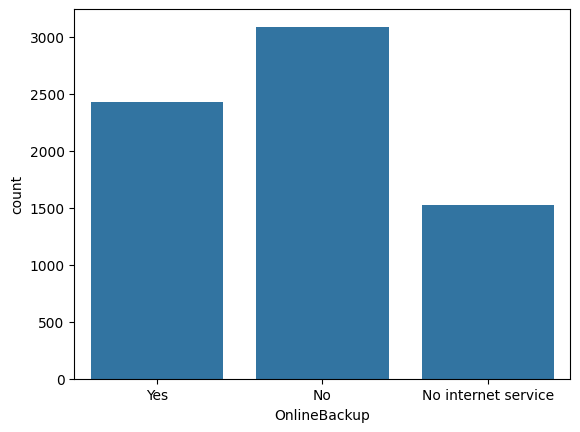

In [54]:
#Visualizing how many customers have OnlineBackup
print(df['OnlineBackup'].value_counts())
ax = sns.countplot(x='OnlineBackup', data=df)
plt.show()

We can observe that the customers having no internet services have very less online backup compared to others.

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


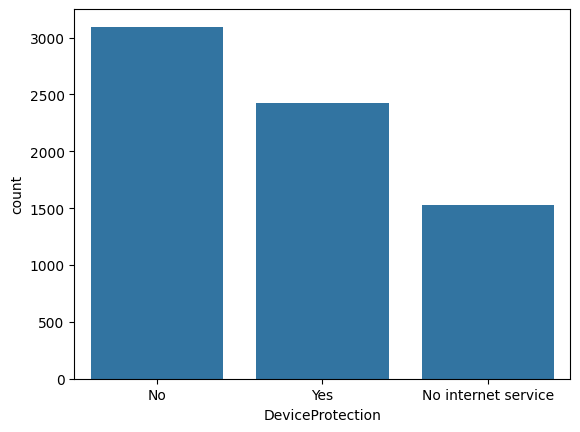

In [55]:
#Visualizing how many customers have DeviceProtection
print(df['DeviceProtection'].value_counts())
ax = sns.countplot(x='DeviceProtection', data=df)
plt.show()

We can see that the customers who do not have internet access, they don't need any device protection

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


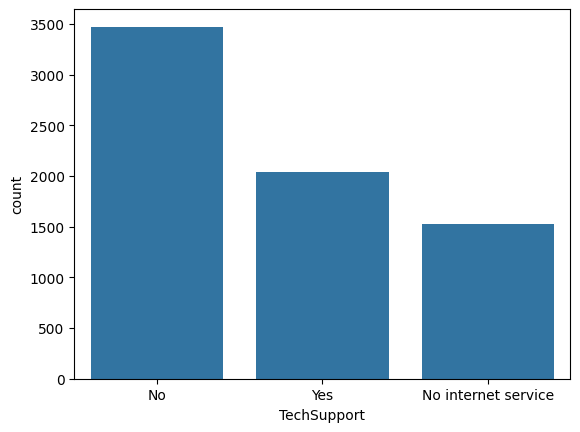

In [56]:
#Visualizing how many customers have TechSuport
print(df['TechSupport'].value_counts())
ax = sns.countplot(x='TechSupport', data=df)
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support.

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


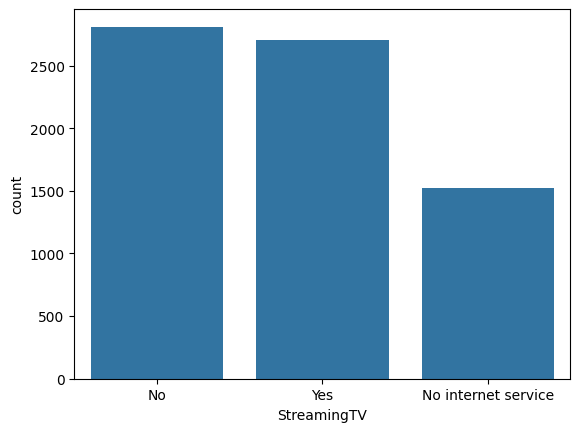

In [57]:
#Visualizing how many customers have StreamingTV
print(df['StreamingTV'].value_counts())
ax = sns.countplot(x='StreamingTV', data=df)
plt.show()

The customers who do not use Streaming TV are little bit high in numbers than the customers who use Streaming TV, and the customers who do not 
own internet they do not have this service much.

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


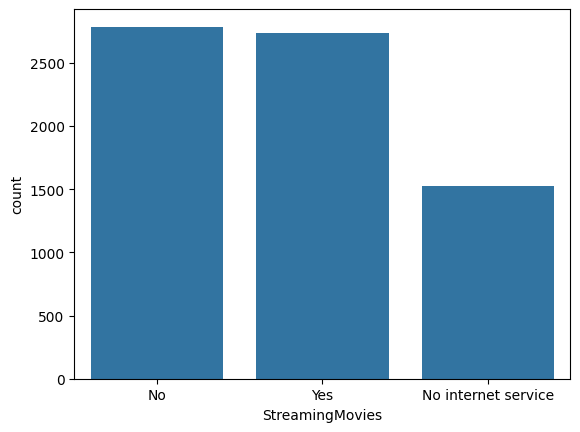

In [58]:
#Visualizing how many customers have StreamingMovies
print(df['StreamingMovies'].value_counts())
ax = sns.countplot(x='StreamingMovies', data=df)
plt.show()

The customers who do not have Streaming Movies are high in count followed by the customers who have Streaming Movies services, and the customers 
who do not have internet services, they have less Streaming Movies services compared to others.

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


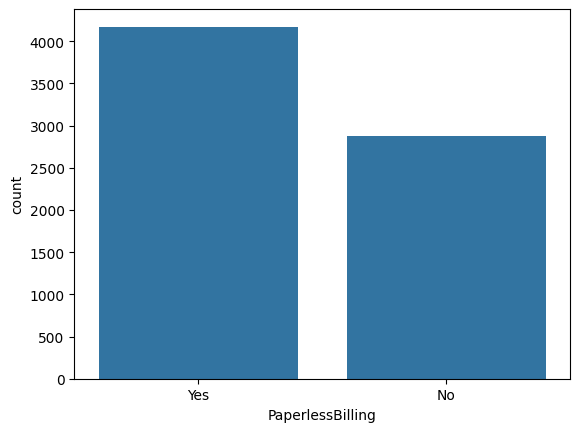

In [59]:
#Visualizing the Billing type the customers need
print(df['PaperlessBilling'].value_counts())
ax = sns.countplot(x='PaperlessBilling', data=df)
plt.show()

Most of the customers prefer paperless billing and average number of customers do not prefer paperless billing, they may receive paper billing.

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


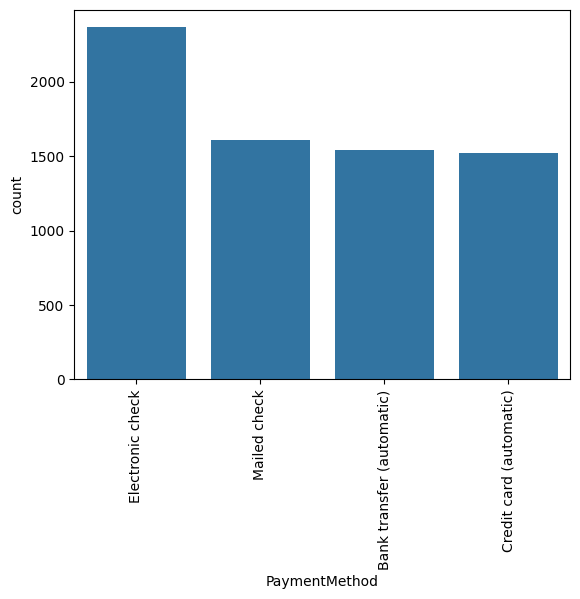

In [60]:
#Visualizing PaymentMethod of the customers
print(df['PaymentMethod'].value_counts())
ax = sns.countplot(x='PaymentMethod', data=df)
plt.xticks(rotation=90)
plt.show()

Most customers prefer Electronic Check as payment method and the customers who prefer Mailed Check, Bank Transfer and Credit Card are 
average in count

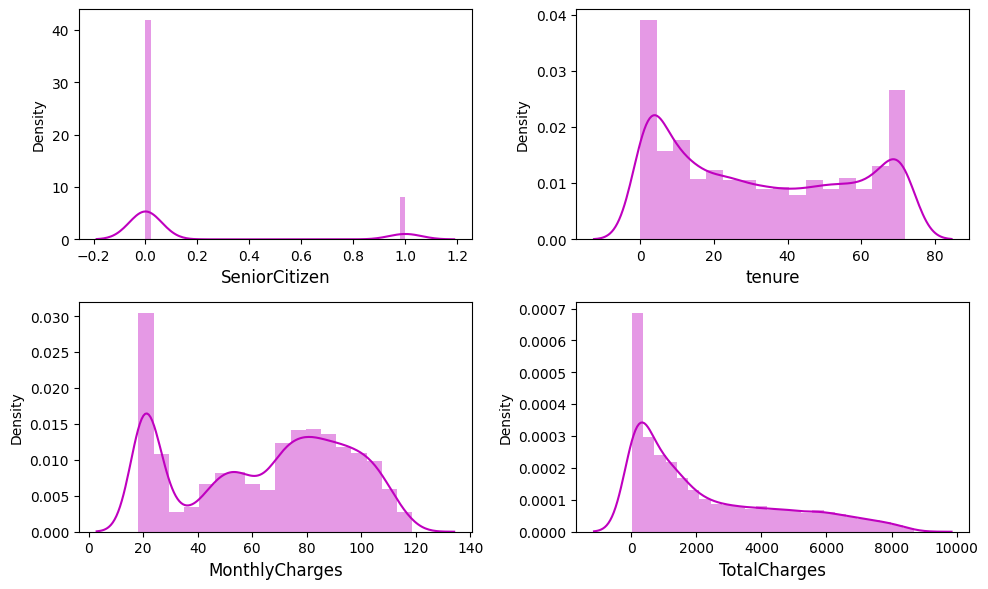

In [61]:
#Let's check how the data has been distributed in the remaining columns
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except 'SeniorCitizen', and the data in the 
column 'TotalCharges' is skewed to the right. Other two columns 'tenure' and 'MonthlyCharges' do not have skewness.

### BiVariate Analysis

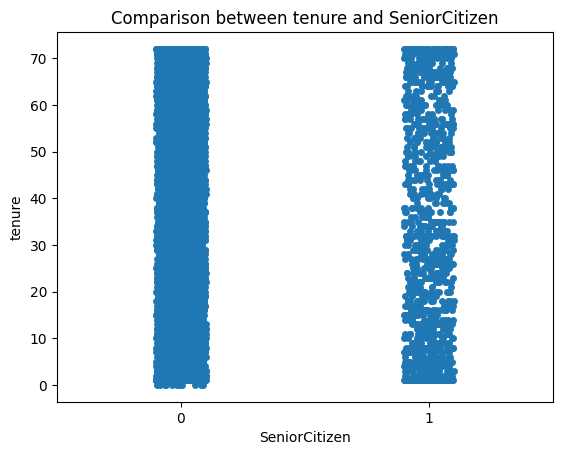

In [62]:
#Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x='SeniorCitizen', y='tenure', data=df)
plt.show()

There is no significant difference between the features, here both features are equal in length.

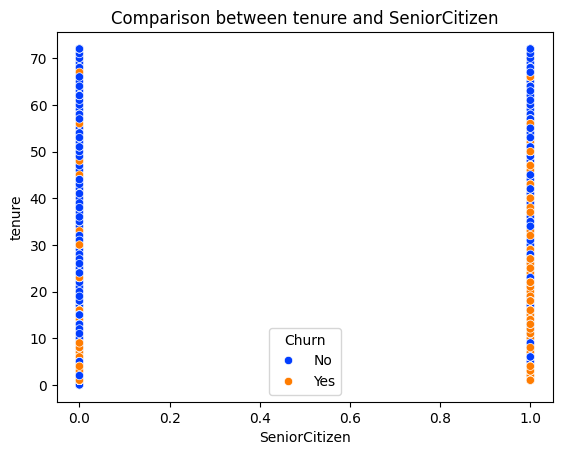

In [63]:
#Comparing tenure and SeniorCitizen on the basis of churn
plt.title("Comparison between tenure and SeniorCitizen")
sns.scatterplot(x='SeniorCitizen', y='tenure', data=df, hue='Churn', palette='bright')
plt.show()

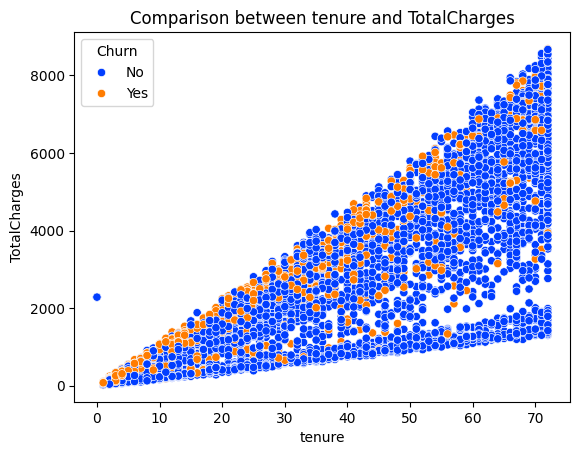

In [64]:
#Comparing tenure and TotalCharges on the basis of churn
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn', palette='bright')
plt.show()

Here we can notice that there is strong linear relation between the features.

As the 'tenure' increases, 'TotalCharges' also increases rapidly. If the customer has low tenure services then there is high chance of 'churn'.

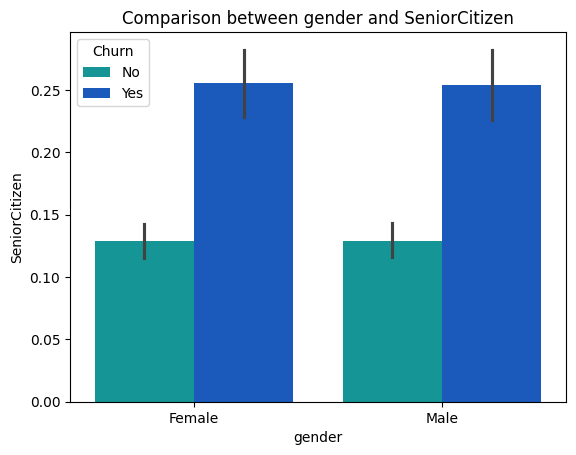

In [65]:
#Comparing gender and SeniorCitizen on the basis of churn
plt.title("Comparison between gender and SeniorCitizen")
sns.barplot(x='gender', y='SeniorCitizen', data=df, hue='Churn', palette='winter_r')
plt.show()

There is no significant difference between the columns. The customer's churn remains unaffected in 'gender' and 'SeniorCitizen' case.

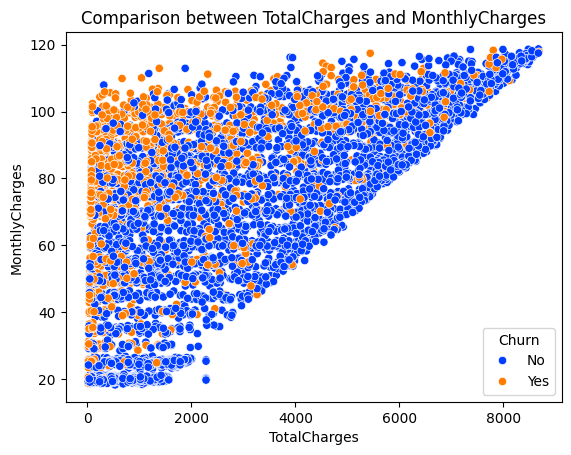

In [66]:
#Comparing TotalCharges and MonthlyCharges on the basis of churn
plt.title("Comparison between TotalCharges and MonthlyCharges")
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df, hue='Churn', palette='bright')
plt.show()

There is a linear relationship between the features. The customer with high monthly charges have high tendency to stop the services, since they 
have high 'TotalCharges'.

Also if the customers ready to contribute with the 'MonthlyCharges' then there is an increment in the 'TotalCharges'.

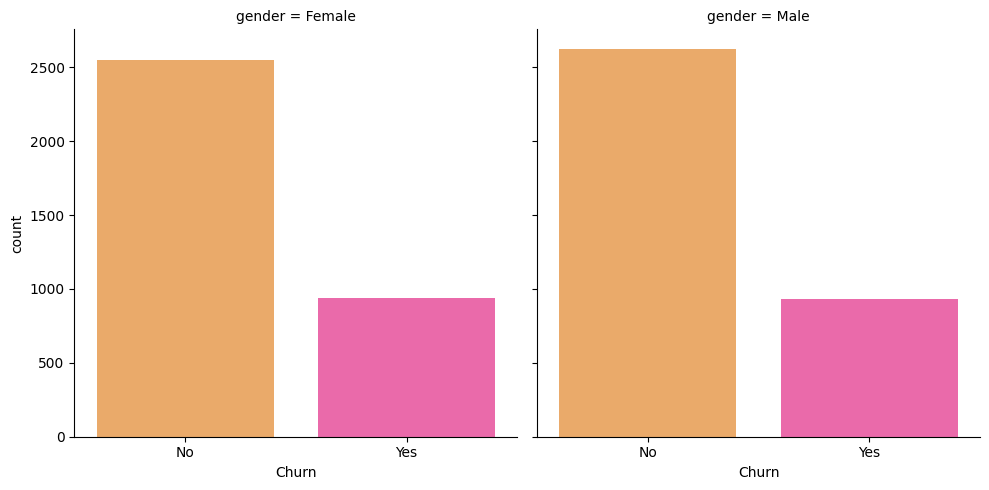

In [67]:
#Checking Churn level in gender
sns.catplot(x='Churn', col='gender', data=df, kind='count', palette='spring_r')

plt.show()

1) In the first plot we can see there is no significant difference in the genders, both the genders have equal churn level.

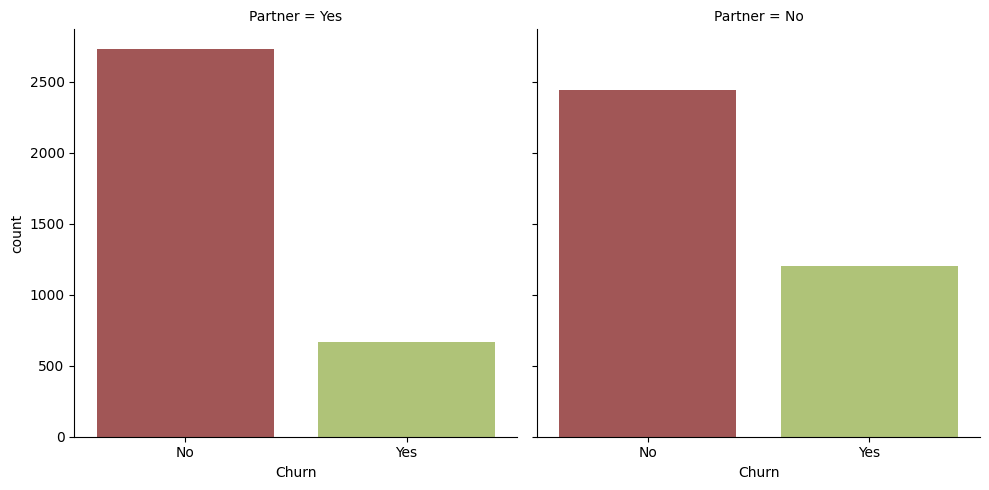

In [68]:
#Checking Churn level in Partner
sns.catplot(x='Churn', col='Partner', data=df, kind='count', palette='tab20b_r')

plt.show()

2) In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

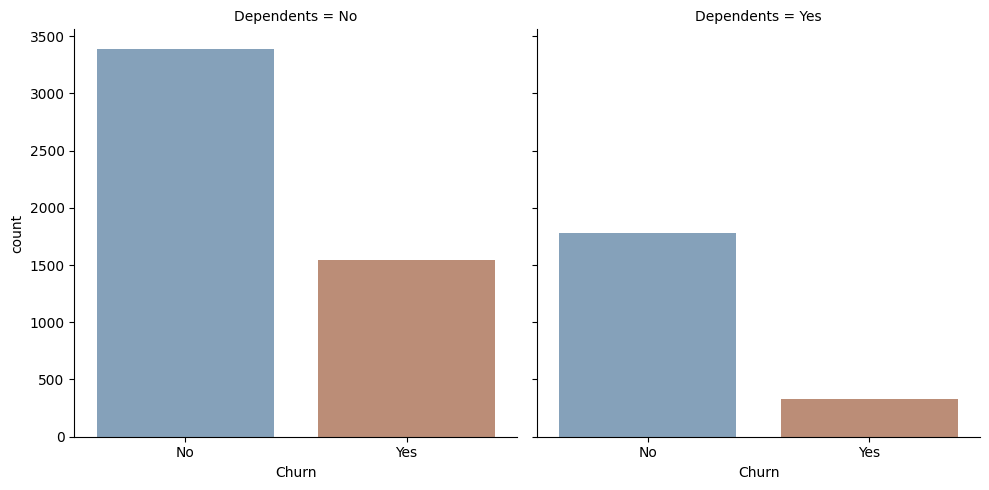

In [69]:
#Checking Churn level in Dependents
sns.catplot(x='Churn', col='Dependents', data=df, kind='count', palette='twilight_shifted')

plt.show()

3) The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

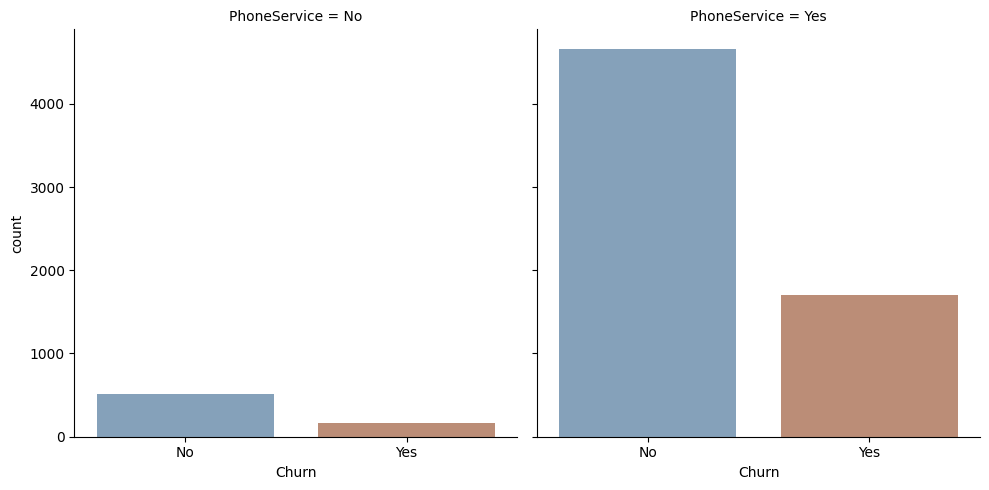

In [70]:
#Checking Churn level in PhoneService
sns.catplot(x='Churn', col='PhoneService', data=df, kind='count', palette='twilight_shifted')

plt.show()

4) In this last plot we can notice the customers who have phone service have high tendency of getting churned.

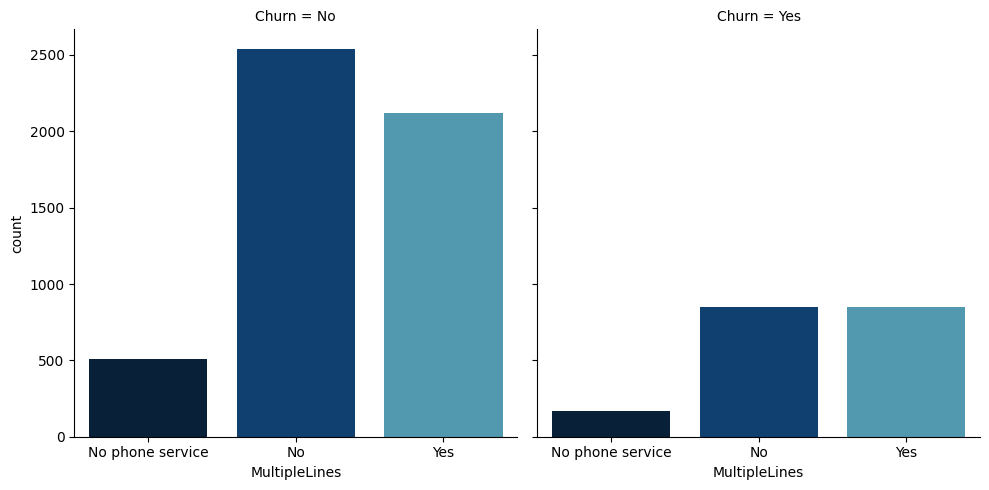

In [71]:
#Checking Churn level in MultipleLines
sns.catplot(x='MultipleLines', col='Churn', data=df, kind='count', palette='ocean')

plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, 
also there are very less number of customers who do not have phone services.

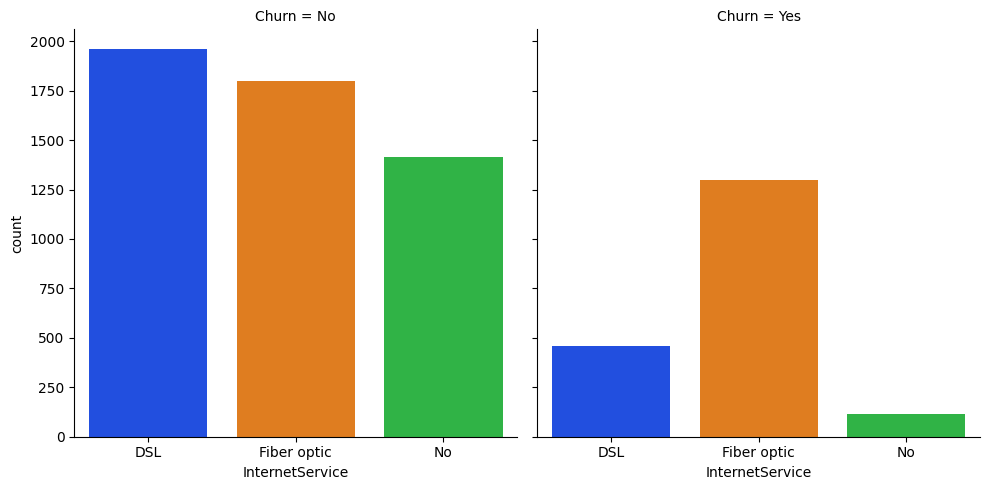

In [72]:
#Checking Churn level in InternetService
sns.catplot(x='InternetService', col='Churn', data=df, kind='count', palette='bright')

plt.show()

The ratio of churn rate is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad 
and need to be focused on. And the customers who own DSL service have very less churn rate.

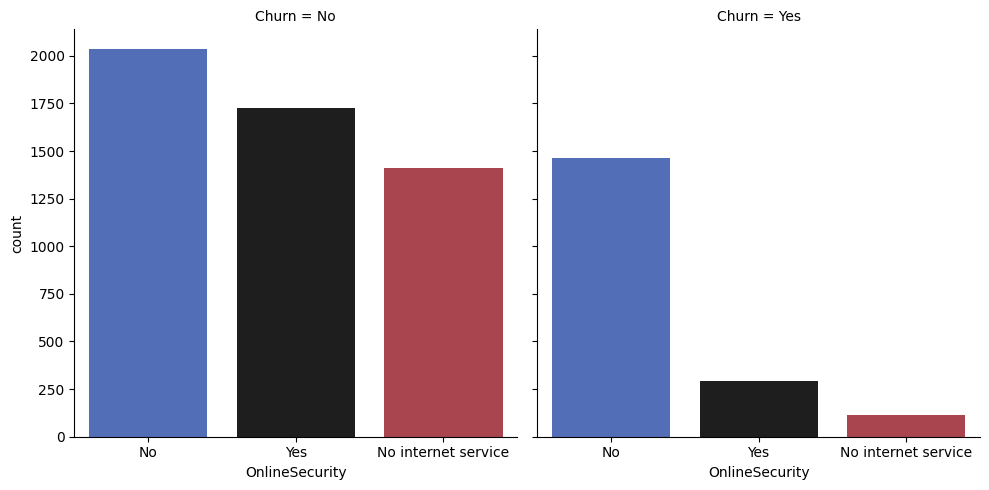

In [73]:
#Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity', col='Churn', data=df, kind='count', palette='icefire')

plt.show()

The customers who have no internet service have very less churn rate and the customers who don not have online security services have high 
tendency of getting churned.

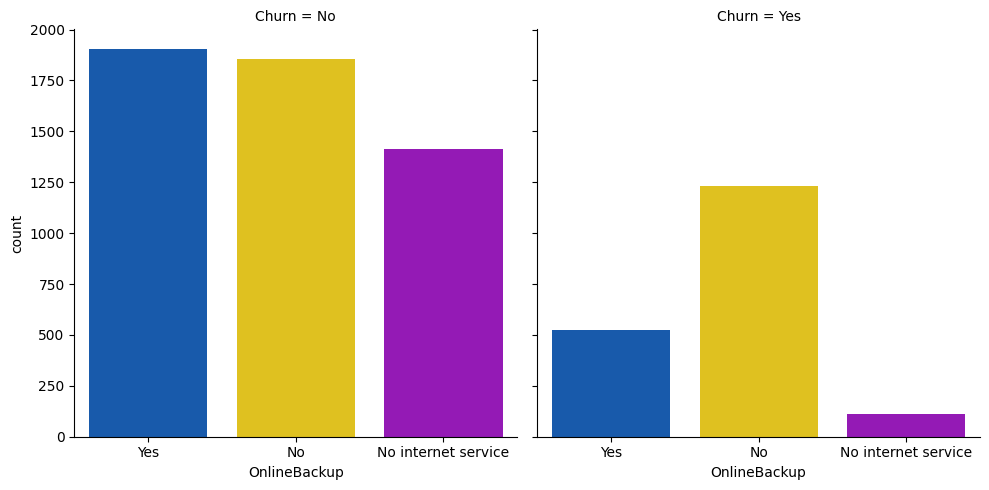

In [74]:
#Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup', col='Churn', data=df, kind='count', palette='prism')

plt.show()

It is also same as in the case of online security. It is obvious that the customers who do not have internet services, do not need any online 
backup. The customers who do not have online backup services have high churn rate.

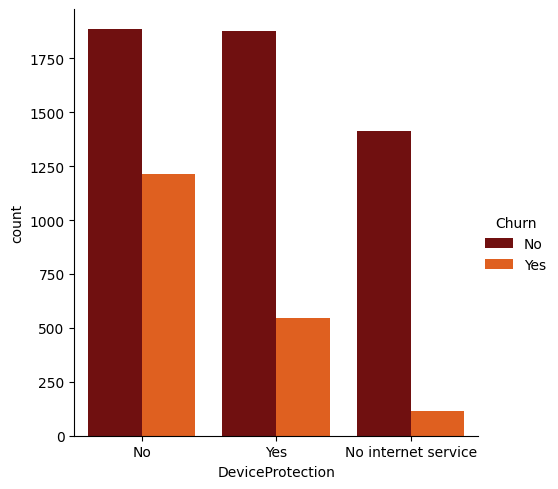

In [75]:
#Checking Churn level in DeviceProtection
sns.catplot(x='DeviceProtection', hue='Churn', data=df, kind='count', palette='gist_heat')

plt.show()

The customers who do not have any Device Protection have very high churn rate compared to others.

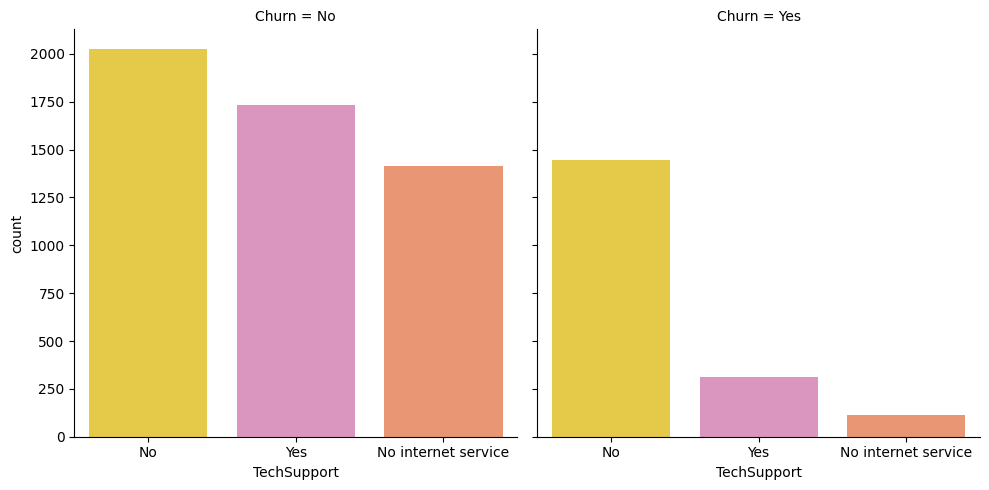

In [76]:
#Checking Churn level in TechSupport
sns.catplot(x='TechSupport', col='Churn', data=df, kind='count', palette='Set2_r')

plt.show()

Here we can see clearly that the customers who do not have any tech support have high churn ratio.

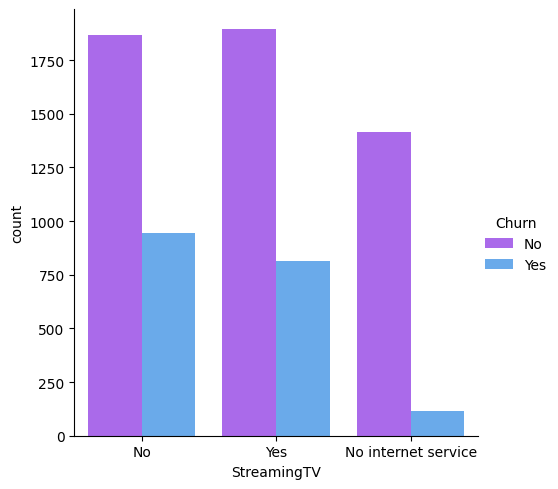

In [77]:
#Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV', hue='Churn', data=df, kind='count', palette='cool_r')

plt.show()

The churn rate is almost same if the customer has StreamingTV or not.

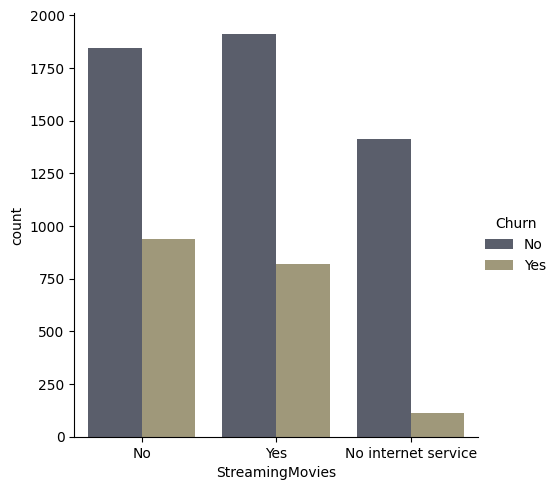

In [78]:
#Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies', hue='Churn', data=df, kind='count', palette='cividis')

plt.show()

The customers who are existing in the company do not own StreamingMovies in their devices, and the churn rate is low when the customer 
do not have internet services.

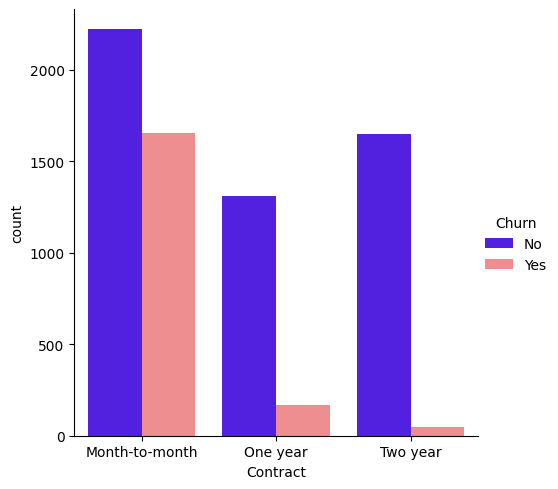

In [79]:
#Checking Churn level in Contract
sns.catplot(x='Contract', hue='Churn', data=df, kind='count', palette='gnuplot2')

plt.show()

The customers who have churned are mostly having month to month contract.

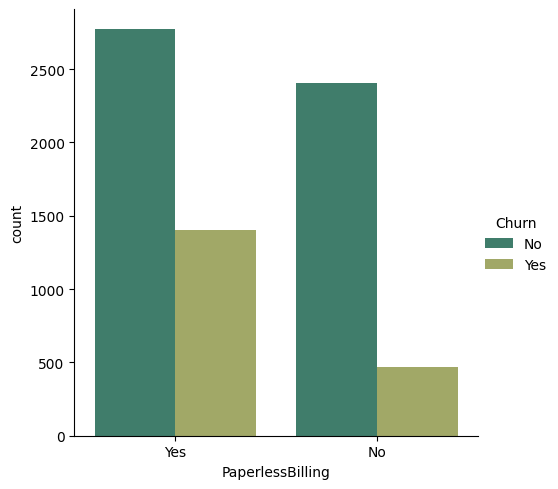

In [80]:
#Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling', hue='Churn', data=df, kind='count', palette='gist_earth')

plt.show()

The customers who prefer paperless billing have high churn rate.

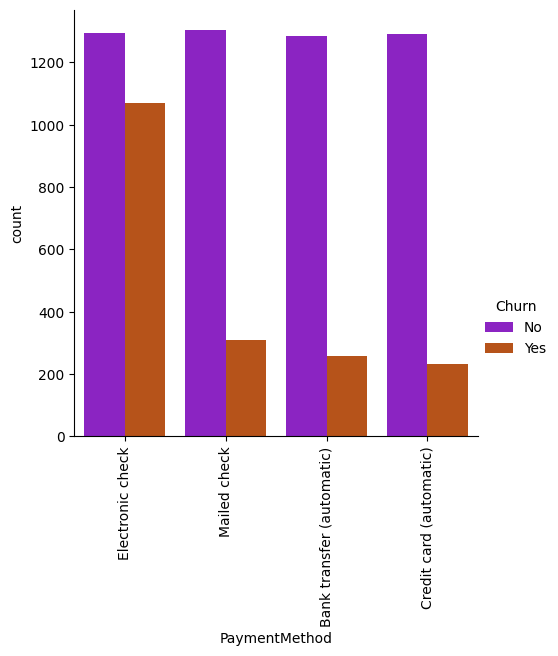

In [81]:
#Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod', hue='Churn', data=df, kind='count', palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

The customers who prefer electronic check have high churn rate, also the customers who exist in the company uses equal payment method.

### MultiVariate Analysis

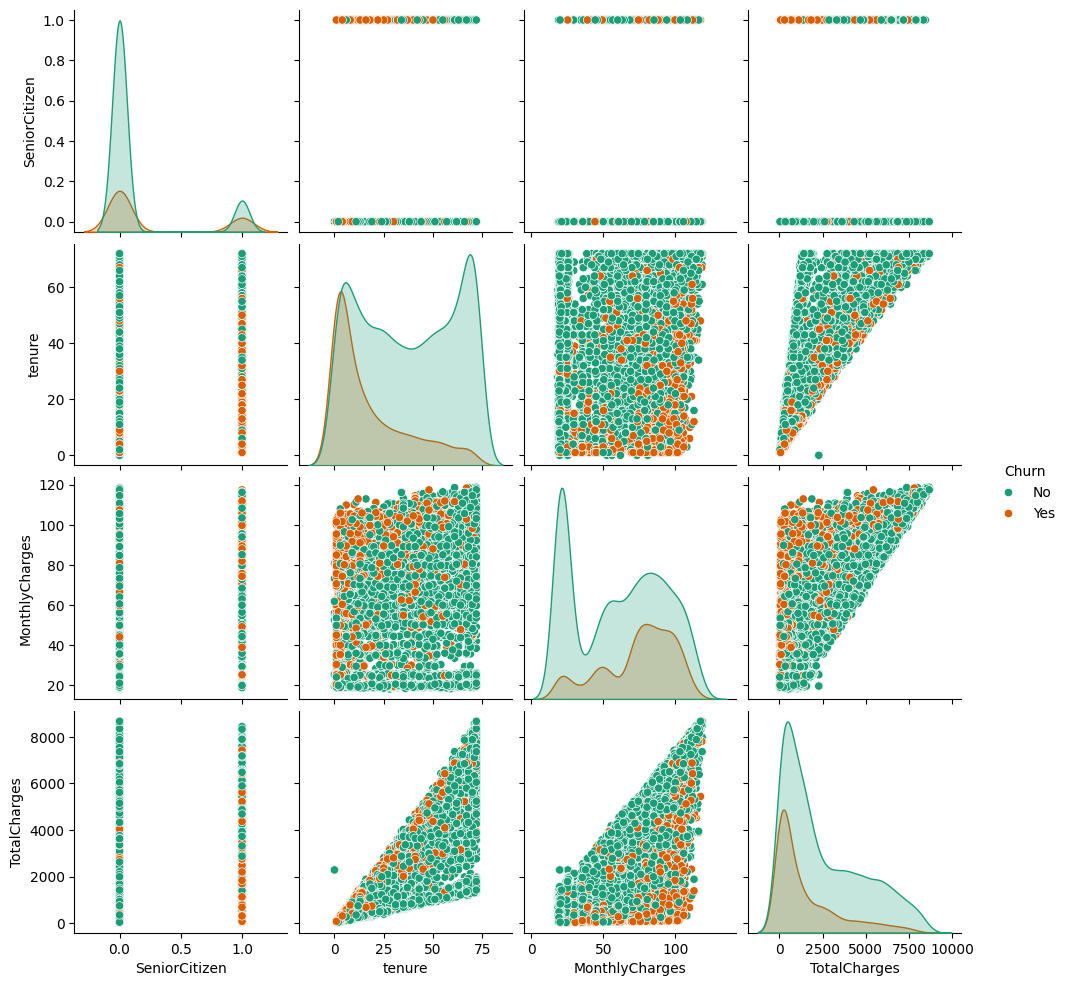

In [82]:
sns.pairplot(df, hue='Churn', palette='Dark2')
plt.show()

1) The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the 
distribution plots.

2) The features 'tenure' and 'TotalCharges', 'MonthlyCharges' and 'TotalCharges' have strong linear realtion with eachother.

3) There are no outliers in any of the columns but let's plot boxplot to identify outliers.

### Checking for Outliers

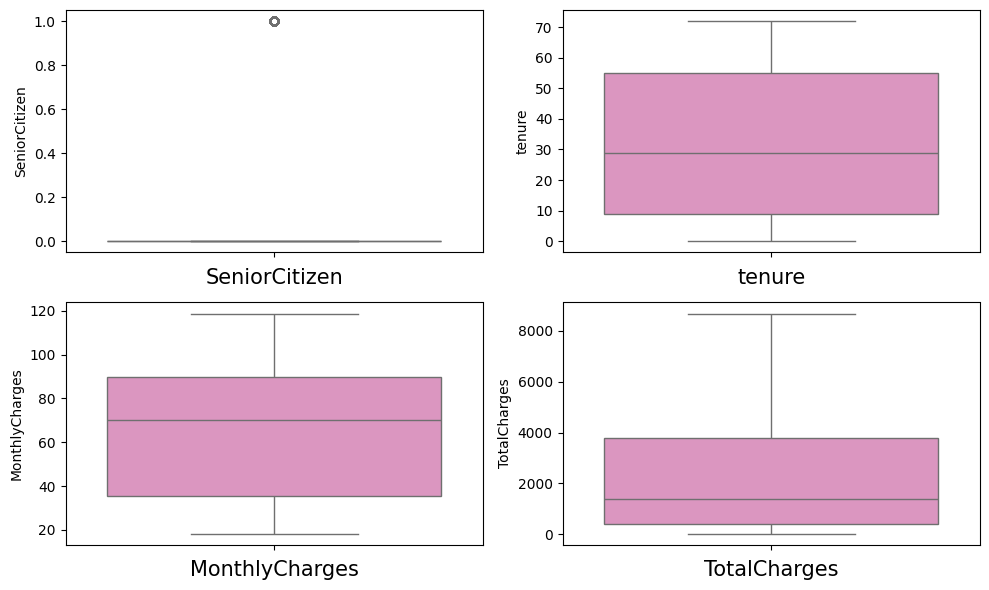

In [83]:
#Let's check the outliers by plotting boxplot
plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data, so no need to remove outliers. Apart from this, none of the columns have 
outliers.

### Checking for Skewness

In [84]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [85]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness. Since 
TotalCharges is continuous in nature, let's use the cube root method to remove skewness.

### Removing Skewness

In [86]:
#Removing skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

We have removed the skewness using the cuberoot method.

In [87]:
#Checking skewness again
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

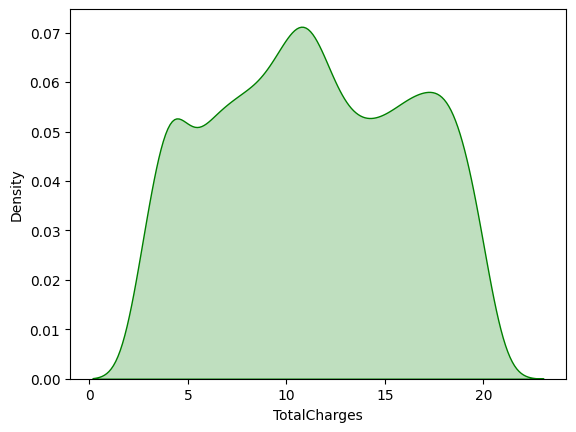

In [88]:
#Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df['TotalCharges'], color='g', kde_kws={'shade':True}, hist=False)
plt.show()

This looks almost normal and the skewness is also removed.

### Encoding Categorical columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


We have converted the categorical columns into numerical columns using Ordinal Encoding Method.

In [90]:
#Statistical summary of numerical
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns we can see all column details here. The counts of all the columns are same, it means that there are 
no null values in the dataset. The describe method shows the count, mean, std, min, IQR and max values of all the columns.

### Correlation between the Target Variable and Independent Variables

In [91]:
#Checking the correlation between the features and the target.
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap.

In [ ]:
!pip install matplotlib==3.7.3

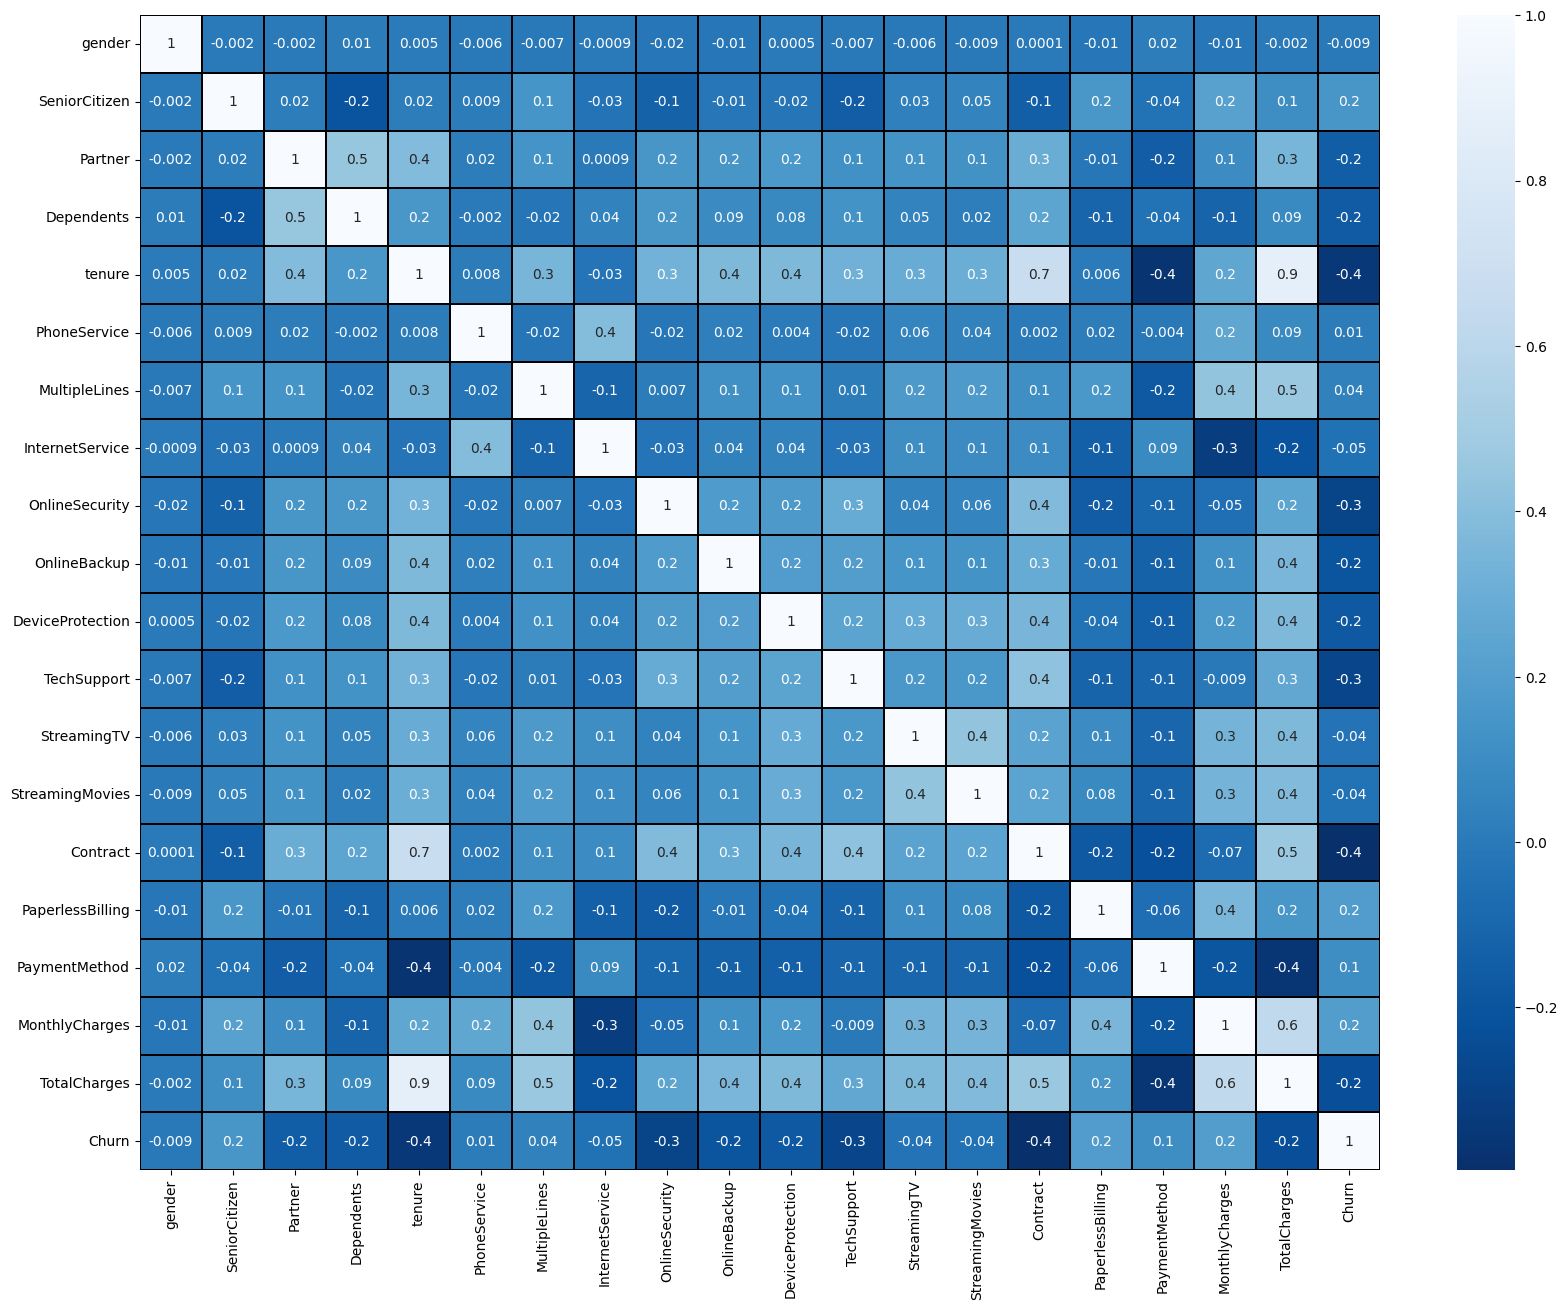

In [92]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True, cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [ ]:
#0: no relation, -0.3 to +0.3: less correlation, greater than -0.5 or greater than +0.5: moderate correlation, 
#greater than -0.7 or greater than +0.7: high correlation

#-1.0 to -0.7 strong negative association.
#-0.7 to -0.3 weak negative association.
#-0.3 to +0.3 little or no association.
#+0.3 to +0.7 weak positive association.
#+0.7 to +1.0 strong positive association

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between feature to feature an feature to label.
This heatmap contains both positive and negative correlation.

1) There is no much positive correlation between the target and the features.

2) The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with Label Column "Churn".

3) The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner 
and Dependents.

4) Also the column gender has very low correlation with the label, we can drop it if necessary.

5) The columns TotalCharges and tenure, Contract and Tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with 
eachother.

In [93]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can onserve the positive and negative correlated features with the target.

### Visualizing the correlation between label and features using bar plot

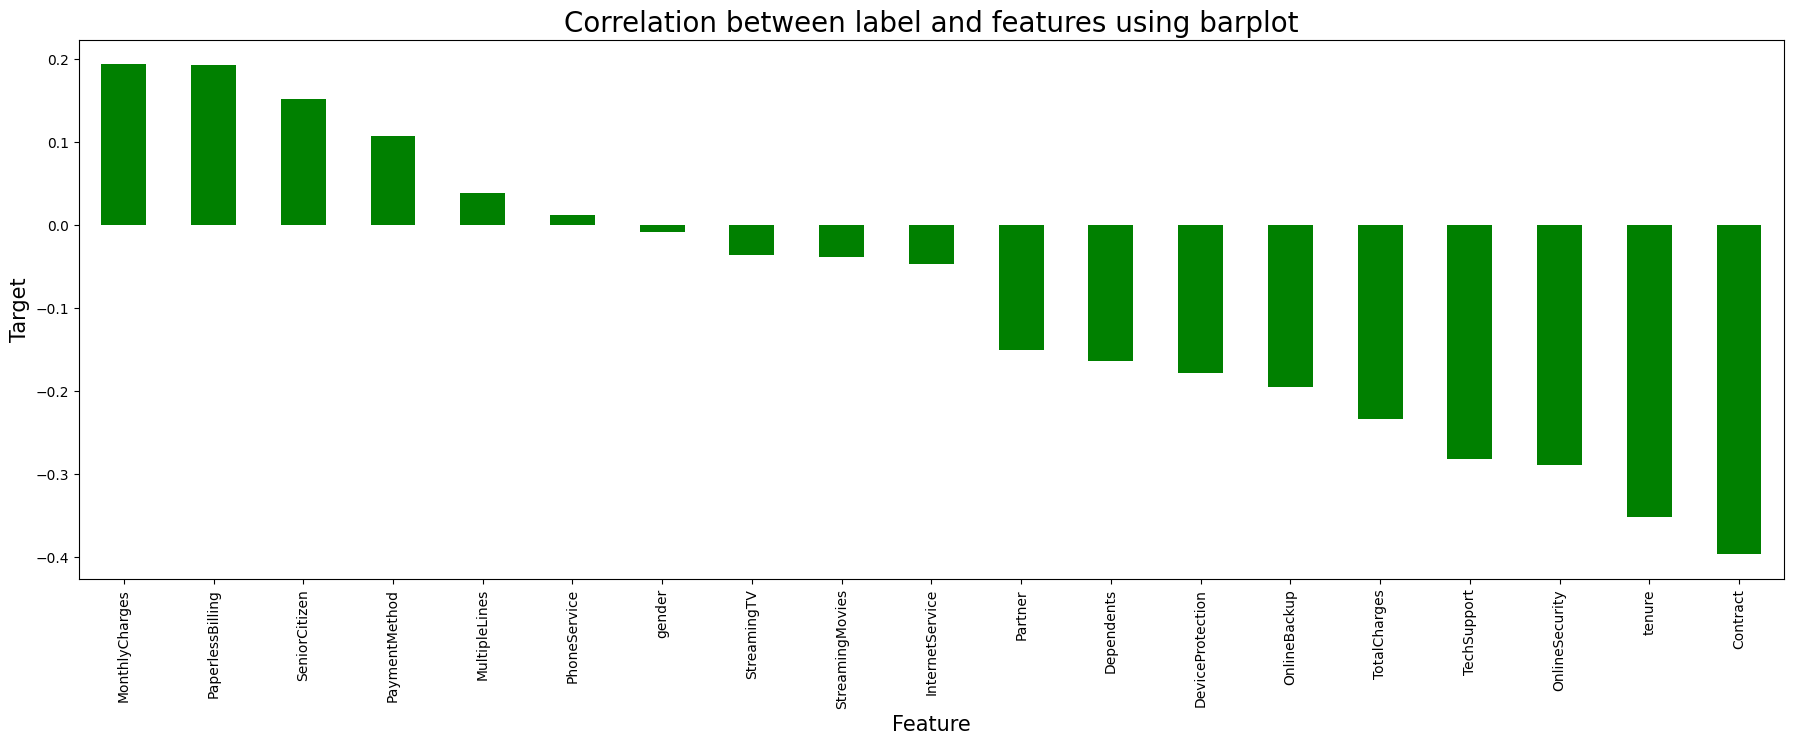

In [94]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color='g')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

From the above bar plot we can notice that there is positive and negative correlation between the features and the target. Here the features 'gender' 
and 'PhoneService' have very less correlation with the target.

### Seperating Features and Label(target)

In [95]:
x = df.drop('Churn', axis=1)
y = df['Churn']

#### Feature Scaling using Standard Scalarization

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [97]:
#Finding variance inflation factor in each scaled column i.e., x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF values we can find the features causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF 
value greater than 10 (Threshold Value), which means they have high correlation with other features. We will drop one of the column first, if the 
same issue exists, then we will remove the column having high VIF.

In [98]:
#Dropping TotalCharges column
x.drop("TotalCharges", axis=1, inplace=True)

In [99]:
#Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved the multicollinearity issue. We can now move ahead for model building.

In [100]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Here, we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

### Oversampling

In [ ]:
#oversampling the data 
!pip install imblearn

In [101]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [102]:
#checking the value count of the target column
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [103]:
y1.value_counts()

Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

In [ ]:
'''
Steps of Making a model for ML
- do non-graphical analysis
- graphical analysis
    - univariate analysis
    - bivariate analysis
    - multivariate analysis
- encode the categorical columns
- check for outliers and remove them, if present
- check for skewness and remove it, if present
- check for multicollinearity and remove it, if present
- apply features scaling methods on numerical features
- apply resampling methods to balance the classes (in classification problem)
- also apply feature selection methods
'''

Now the data is balanced. So, we can build machine learning classification models.

## Modelling

### Finding the best random state 

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu, "at random_state", maxRS)

Best accuracy is  0.8698872785829308 at random_state 102


The best accuracy is 86.98% at random_state 102

### Creating train test split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

## Classification Algorithms

In [117]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [108]:
#Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7950780880265026
[[1396  168]
 [ 265  284]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1564
         1.0       0.63      0.52      0.57       549

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy for this model is 79.50%

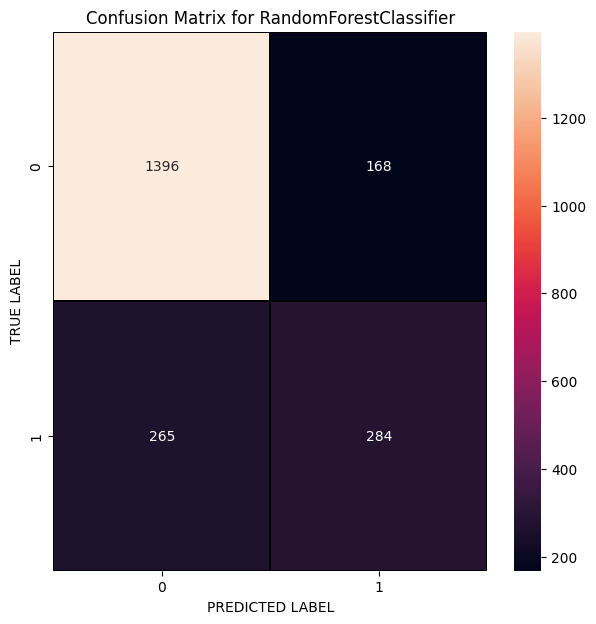

In [119]:
#Let's plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test, predRFC)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

### Logistic Regression

In [109]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8050165641268339
[[1400  164]
 [ 248  301]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1564
         1.0       0.65      0.55      0.59       549

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



The accuracy score using LogisticRegression is 80.50%

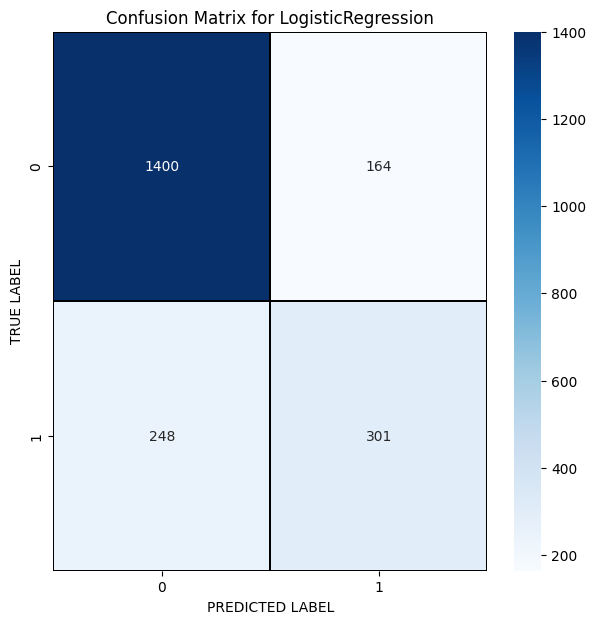

In [123]:
#Let's plot confusion matrix for LogisticRegression
cm = confusion_matrix(y_test, predLR)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap='Blues', fmt='g', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for LogisticRegression")
plt.show()

### Support Vector Machine Classifier

In [111]:
#Checking accuracy for SupportVectorMachineClassifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7993374349266446
[[1421  143]
 [ 281  268]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1564
         1.0       0.65      0.49      0.56       549

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score using SupportVectorMachineClassifier is 79.93%

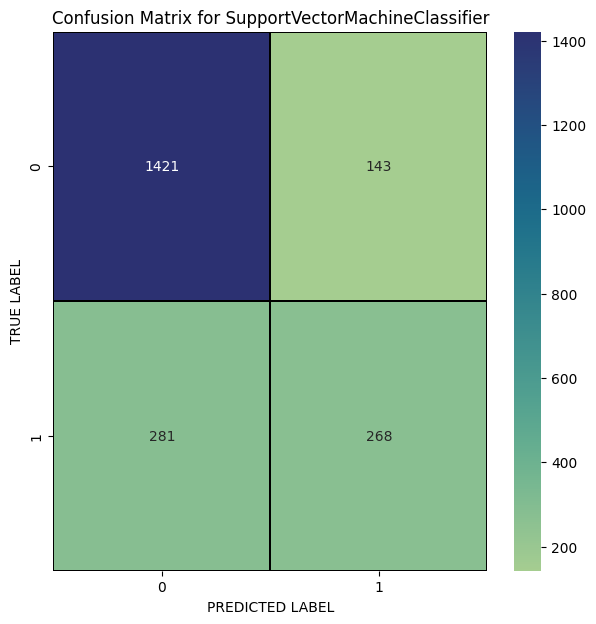

In [125]:
#Let's plot confusion matrix for SupportVectorMachineClassifier
cm = confusion_matrix(y_test, predsvc)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap='crest', fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for SupportVectorMachineClassifier")
plt.show()

### Gradient Boosting Classifier

In [112]:
#Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.807382867960246
[[1413  151]
 [ 256  293]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1564
         1.0       0.66      0.53      0.59       549

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



The accuracy score using GradientBoostingClassifier is 80.73%

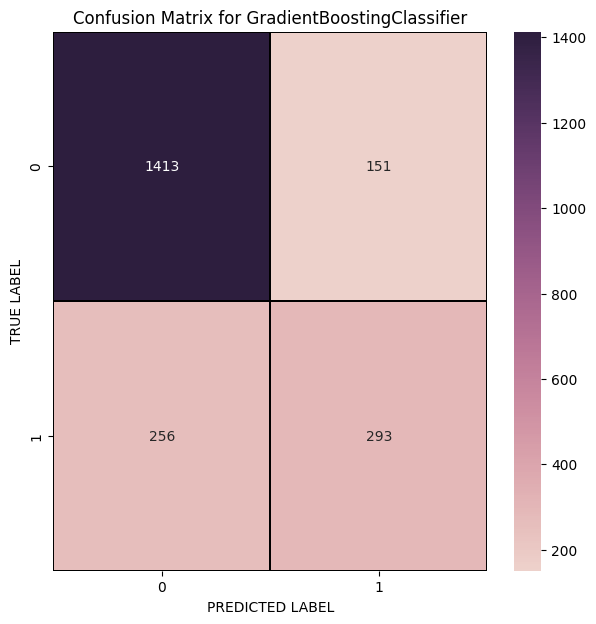

In [127]:
#Let's plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_test, predGB)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap=sns.cubehelix_palette(as_cmap=True), fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.show()

### Ada Boost Classifier

In [113]:
#Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8097491717936584
[[1402  162]
 [ 240  309]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1564
         1.0       0.66      0.56      0.61       549

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



The accuracy score using AdaBoostClassifier is 80.97%

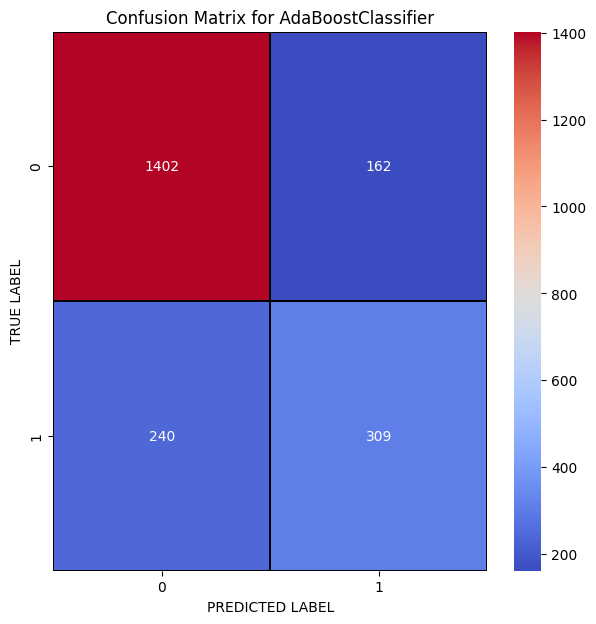

In [128]:
#Let's plot confusion matrix for AdaBoostClassifier
cm = confusion_matrix(y_test, predABC)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap='coolwarm', fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for AdaBoostClassifier")
plt.show()

### Bagging Classifier

In [114]:
#Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.791292001893043
[[1401  163]
 [ 278  271]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1564
         1.0       0.62      0.49      0.55       549

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy score using BaggingClassifier is 79.12%

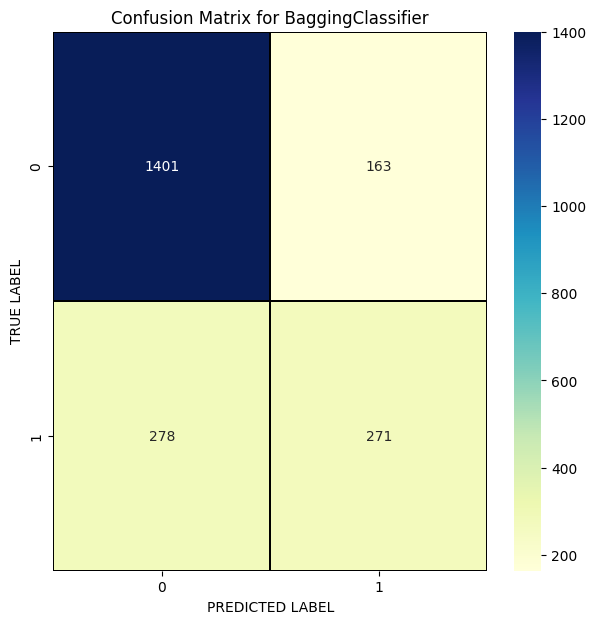

In [129]:
#Let's plot confusion matrix for BaggingClassifier
cm = confusion_matrix(y_test, predBC)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap='YlGnBu', fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for BaggingClassifier")
plt.show()

### Extra Trees Classifier

In [115]:
#Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7789872219592996
[[1372  192]
 [ 275  274]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1564
         1.0       0.59      0.50      0.54       549

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



The accuracy score using ExtraTreesClassifier is 77.89%

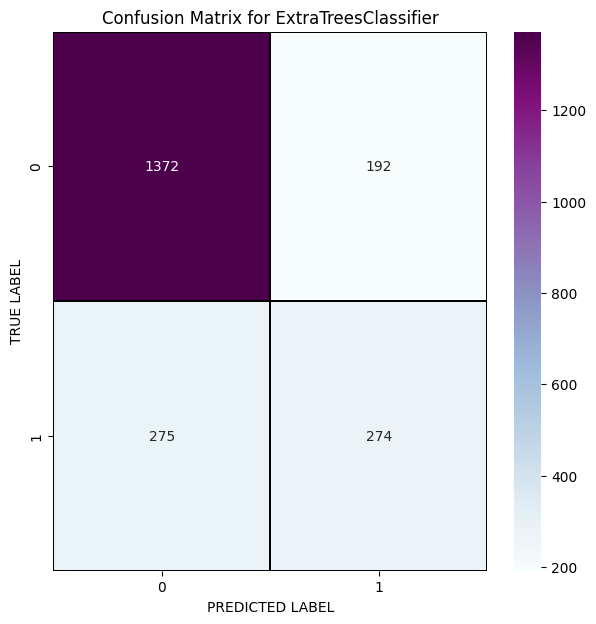

In [130]:
#Let's plot confusion matrix for ExtraTreesClassifier
cm = confusion_matrix(y_test, predET)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', cmap='BuPu', fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for ExtraTreesClassifier")
plt.show()

### Cross Validation Score

In [118]:
from sklearn.model_selection import cross_val_score

In [ ]:
'''
cv=5--- it is a fold value 1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvalriable, cv=foldvalue, scoring='accuracy')

in classification algorithms - default scoring parameter - aacuracy
for regression - default scoring parameter is - r2 score
'''

In [148]:
#Checking CV score for RandomForestClassifier
score = cross_val_score(RFC, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predRFC))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predRFC) - score.mean())

[0.77391304 0.79130435 0.88888889 0.90430159 0.91541808]
Mean CV Score:  0.8547651903064095
Accuracy Score:  0.7950780880265026
Difference between Accuracy Score and Cross Validation Score is:  -0.05968710227990692


In [149]:
#Checking CV score for RandomForestClassifier
from sklearn.metrics import f1_score
score = cross_val_score(RFC, x1, y1, scoring='f1')
print(score)
print("Mean CV Score: ", score.mean())
print("f1 Score: ", f1_score(y_test, predRFC))
print("Difference between f1 Score and Cross Validation Score is: ", f1_score(y_test, predRFC) - score.mean())

[0.74701412 0.77287066 0.90247191 0.91188432 0.91636364]
Mean CV Score:  0.850120928791311
f1 Score:  0.5674325674325674
Difference between f1 Score and Cross Validation Score is:  -0.28268836135874353


In [150]:
#Checking CV score for LogisticRegression
score = cross_val_score(LR, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predLR))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predLR) - score.mean())

[0.77004831 0.76086957 0.77342995 0.77670372 0.78685355]
Mean CV Score:  0.7735810200264778
Accuracy Score:  0.8050165641268339
Difference between Accuracy Score and Cross Validation Score is:  0.031435544100356094


In [151]:
#Checking CV score for SupportVectorMachineClassifier
score = cross_val_score(svc, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predsvc))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predsvc) - score.mean())

[0.77681159 0.76714976 0.81545894 0.81778637 0.83035283]
Mean CV Score:  0.8015118975070221
Accuracy Score:  0.7993374349266446
Difference between Accuracy Score and Cross Validation Score is:  -0.0021744625803775675


In [152]:
#Checking CV score for GradientBoostingClassifier
score = cross_val_score(svc, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predGB))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predGB) - score.mean())

[0.77681159 0.76714976 0.81545894 0.81778637 0.83035283]
Mean CV Score:  0.8015118975070221
Accuracy Score:  0.807382867960246
Difference between Accuracy Score and Cross Validation Score is:  0.005870970453223934


In [153]:
#Checking CV score for AdaBoostClassifier
score = cross_val_score(ABC, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predABC))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predABC) - score.mean())

[0.76859903 0.77391304 0.82512077 0.84340261 0.84775254]
Mean CV Score:  0.8117575995311512
Accuracy Score:  0.8097491717936584
Difference between Accuracy Score and Cross Validation Score is:  -0.0020084277374928794


In [154]:
#Checking CV score for BaggingClassifier
score = cross_val_score(BC, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predBC))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predBC) - score.mean())

[0.73768116 0.76425121 0.87294686 0.87868536 0.88351861]
Mean CV Score:  0.8274166380640839
Accuracy Score:  0.791292001893043
Difference between Accuracy Score and Cross Validation Score is:  -0.03612463617104089


In [155]:
#Checking CV score for ExtraTreesClassifier
score = cross_val_score(ET, x1, y1)
print(score)
print("Mean CV Score: ", score.mean())
print("Accuracy Score: ", accuracy_score(y_test, predET))
print("Difference between Accuracy Score and Cross Validation Score is: ", accuracy_score(y_test, predET) - score.mean())

[0.8057971  0.79806763 0.8942029  0.90043499 0.90865152]
Mean CV Score:  0.8614308296149975
Accuracy Score:  0.7789872219592996
Difference between Accuracy Score and Cross Validation Score is:  -0.08244360765569791


ExtraTreesClassifier is our best model as the difference between accuracy score and cross validation score is least, and CV score is highest.

### ExtraTreesClassifier is our best model

### Hyper Parameter Tuning

In [156]:
#Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'], 'random_state':[10,50,1000], 'max_depth':[0,10,20], 'n_jobs':[-2,-1,1], 'n_estimators':[50,100,200,300]}

In [158]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [159]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [160]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [164]:
Final_model = ExtraTreesClassifier(criterion='gini', max_depth=10, n_estimators=100, n_jobs=-2, random_state=1000)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

80.31235210601041


In [165]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=100, n_jobs=-2, random_state=50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

80.31235210601041


### Plotting ROC and compare AUC for all the models used

In [166]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET, x_test, y_test)  #ax_ = Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\ziaik\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

Here we can see Area Under Curve for each model used.

### Plotting ROC and compare AUC for all the models used

In [167]:
#Let's check the AUC for the best model after hyper parameter tuning
plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

NameError: name 'plot_roc_curve' is not defined

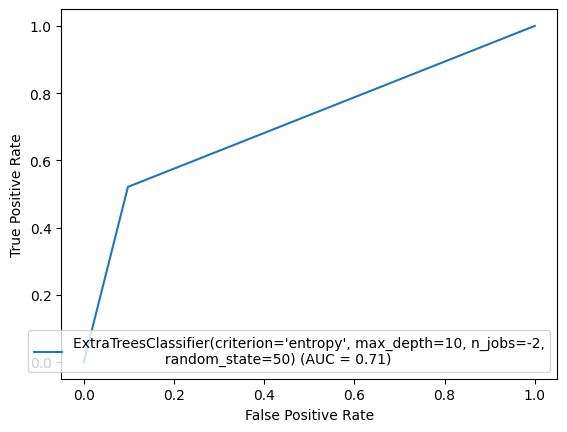

In [168]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 71%.

### Saving the model

In [169]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")


['Telecom_Customer_Churn_Analysis.pkl']

### Predicting the saved model

In [178]:
#Let's load the saved model and get the prediction
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 0., 1., 0.])

These are the predicted churn values of the customer.

In [179]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,1.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
2108,0.0,0.0
2109,0.0,0.0
2110,0.0,0.0
2111,1.0,0.0
